<a href="https://colab.research.google.com/github/RosarioH10062002/RosarioH10062002/blob/main/ISP_Process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LIBRARIES**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import re
from collections import Counter
from scipy.io import loadmat
try:
    import nilearn
    from nilearn import image as nimg
    from nilearn import plotting
    from nilearn.connectome import ConnectivityMeasure

except ImportError:
    !pip install nilearn
    import nilearn
    from nilearn import image as nimg
    from nilearn import plotting as nplot



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**UPLOAD DATA**

In [ ]:

root_path_pd = Path("/content/drive/MyDrive/M2/Impact Scholar Programme/Preprocessed_data/CONN_PREPROCESS_PD")
root_path_ctrl = Path("/content/drive/MyDrive/M2/Impact Scholar Programme/Preprocessed_data/CONN_PREPROCESS_CTRL")

pd_subjects = [100005,100006,100007,100018,100267,100268]
ctrl_subjects = [101195,102447,103161,103183,103467,103542]


In [ ]:
#@title PD data
pd_paths = {}

for subject in pd_subjects:
    mat_path = (
        root_path_pd
        / str(subject)
        / "conn_project01"
        / "data"
        / "ROI_Subject001_Session001.mat"
    )
    pd_paths[subject] = mat_path # creamos el diccionario con las rutas
    print(subject, "->", mat_path.exists())


100005 -> True
100006 -> True
100007 -> True
100018 -> True
100267 -> True
100268 -> True


In [ ]:
#@title Ctrl data
ctrl_paths = {}
for subject in ctrl_subjects:
    mat_path = (
        root_path_ctrl
        / str(subject)
        / "conn_project01"
        / "data"
        / "ROI_Subject001_Session001.mat"
    )
    ctrl_paths[subject] = mat_path
    print(subject, "->", mat_path.exists())
    #print(mat_path)

101195 -> True
102447 -> True
103161 -> True
103183 -> True
103467 -> True
103542 -> True


In [ ]:
#@title EXTRACT THE REGIONS OF INTEREST
def get_roi_matrix(path_names):
  path_try = loadmat(path_names)
  names = path_try["names"]
  data = path_try["data"]
  roi_names = [n[0] if isinstance(n, np.ndarray) else n for n in names[0]]
  #roi_names
  roi_idx = [
      i for i, name in enumerate(roi_names)
      if name.startswith(("networks.DefaultMode.",
                          "networks.Salience.",
                          "networks.FrontoParietal."))
  ]
  roi_interest_names = [roi_names[i] for i in roi_idx]
  roi_interest_data = [data[0, i] for i in roi_idx]
  X_interest = np.column_stack([np.asarray(arr).squeeze() for arr in roi_interest_data])
  #print("X_interest shape:", X_interest.shape)
  return X_interest, roi_interest_names

In [ ]:
X_list_pd = []
for pd in pd_paths.values():
  path_name = pd
  X_interest, roi_interest_names = get_roi_matrix(path_name)
  X_list_pd.append(X_interest)

conn = ConnectivityMeasure(kind="correlation")
FC_all_pd = conn.fit_transform(X_list_pd)
#FC_all_pd.shape (6, 15, 15)
#plotting.plot_matrix(FC, figure=(6, 6), labels=roi_interest_names)

/tmp/ipython-input-4022596799.py:8: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.14.0, the default strategy will be replaced by the new strategy, the 'zscore' option will be removed. and using standardize=True will fall back to 'zscore_sample'.To avoid this warning, please use 'zscore_sample' instead.
  FC_all_pd = conn.fit_transform(X_list_pd)
/tmp/ipython-input-4022596799.py:8: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.14.0, the default strategy will be replaced by the new strategy, the 'zscore' option will be removed. and using standardize=True will fall back to 'zscore_sample'.To avoid this warning, please

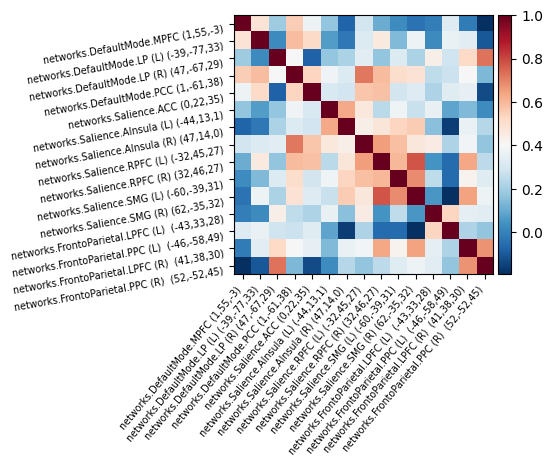

In [ ]:
FC0 = FC_all_pd[0]
plotting.plot_matrix(FC0, figure=(6, 6), labels=roi_interest_names)

#Static Functional Connectivity

In [ ]:
X_list_ctrl = []
for ctrl in ctrl_paths.values():
  path_name = ctrl
  X_interest, roi_interest_names = get_roi_matrix(path_name)
  X_list_ctrl.append(X_interest)

conn = ConnectivityMeasure(kind="correlation")
FC_all_ctrl = conn.fit_transform(X_list_ctrl)
FC_all_ctrl.shape

/tmp/ipython-input-2026298012.py:8: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.14.0, the default strategy will be replaced by the new strategy, the 'zscore' option will be removed. and using standardize=True will fall back to 'zscore_sample'.To avoid this warning, please use 'zscore_sample' instead.
  FC_all_ctrl = conn.fit_transform(X_list_ctrl)
/tmp/ipython-input-2026298012.py:8: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.14.0, the default strategy will be replaced by the new strategy, the 'zscore' option will be removed. and using standardize=True will fall back to 'zscore_sample'.To avoid this warning, pl

(6, 15, 15)

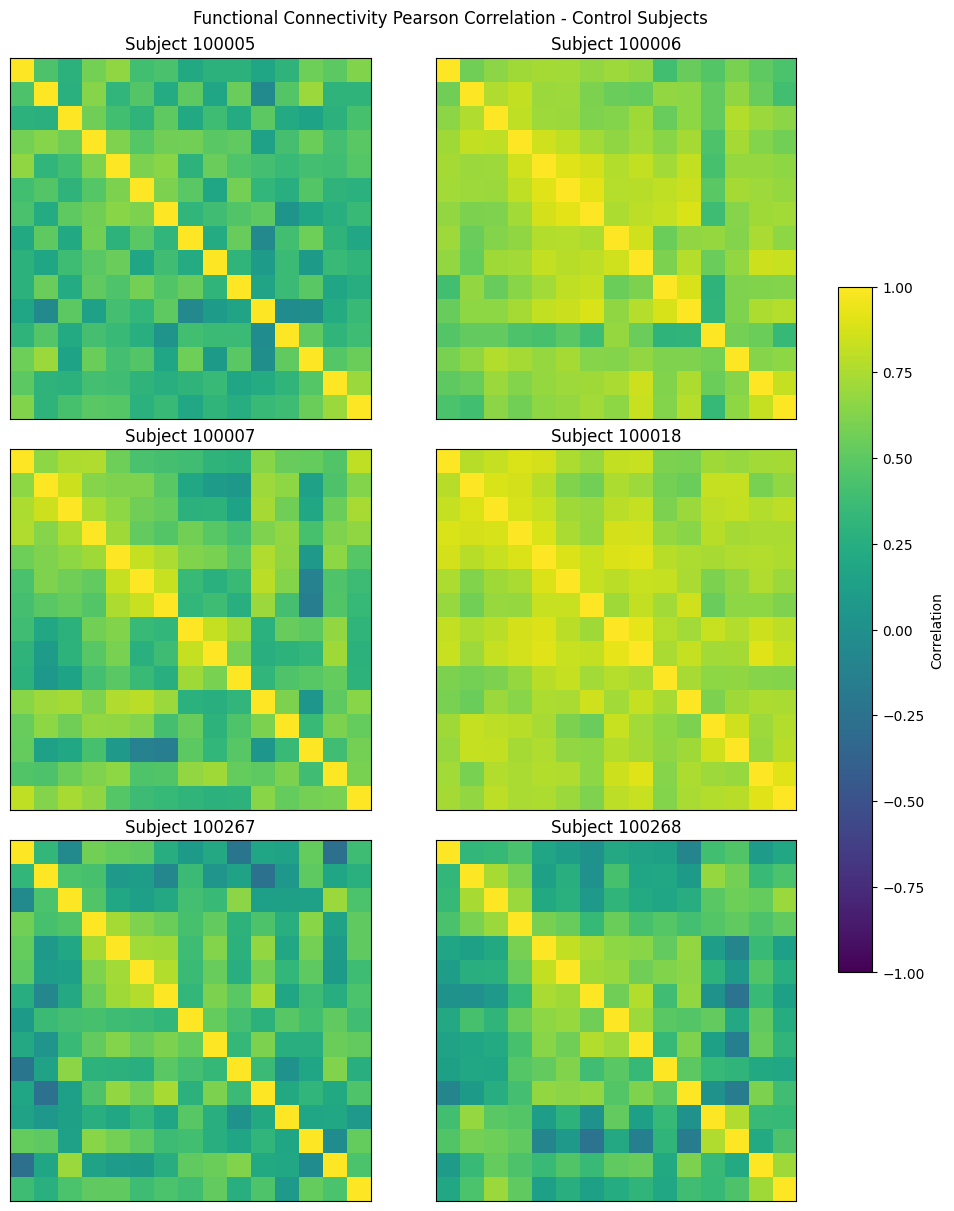

In [ ]:
FC_all = FC_all_ctrl
n_subj = FC_all.shape[0]

n_cols = 2
n_rows = int(np.ceil(n_subj / n_cols))
fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(10, 4 * n_rows),
    constrained_layout=True
)
axes = axes.flatten()
vmin, vmax = -1, 1   # importante para comparar sujetos

for i in range(n_subj):
    im = axes[i].imshow(
        FC_all[i],
        cmap="viridis",
        vmin=vmin,
        vmax=vmax
    )
    axes[i].set_title(f"Subject {pd_subjects[i]}")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
for j in range(n_subj, len(axes)):
    axes[j].axis("off")
fig.colorbar(im, ax=axes, shrink=0.6, label="Correlation")
plt.suptitle("Functional Connectivity Pearson Correlation - Control Subjects")
plt.show()



In [ ]:
FC0 = FC_all_ctrl[0]
ax = plotting.plot_matrix(FC0, figure=(6, 6), labels=roi_interest_names)
ax.set_title("Functional Connectivity – Control Subject 1", fontsize=12)

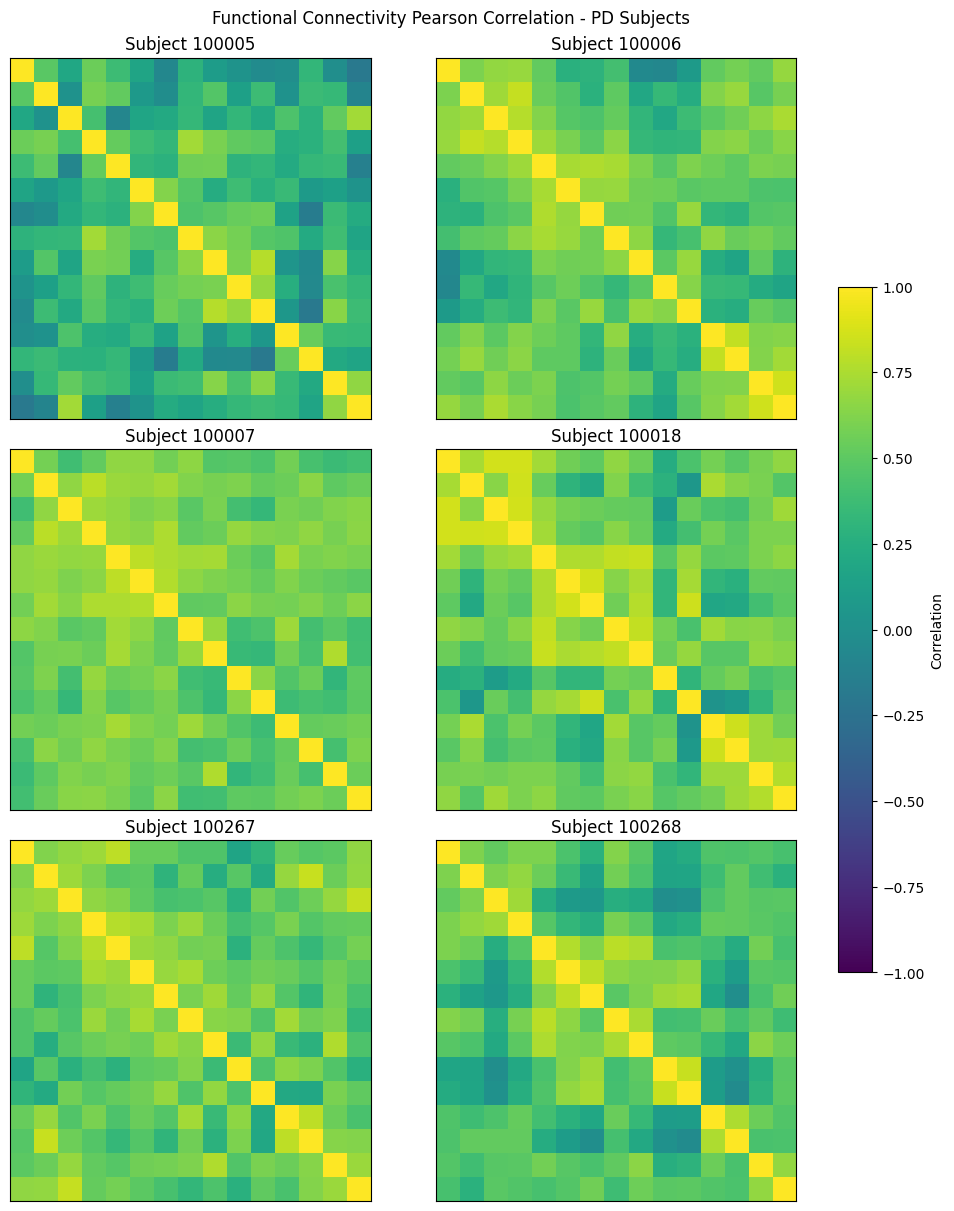

In [ ]:
FC_all = FC_all_pd
n_subj = FC_all.shape[0]

n_cols = 2
n_rows = int(np.ceil(n_subj / n_cols))
fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(10, 4 * n_rows),
    constrained_layout=True
)
axes = axes.flatten()
vmin, vmax = -1, 1   # importante para comparar sujetos

for i in range(n_subj):
    im = axes[i].imshow(
        FC_all[i],
        cmap="viridis",
        vmin=vmin,
        vmax=vmax
    )
    axes[i].set_title(f"Subject {pd_subjects[i]}")
    axes[i].set_xticks([])
    axes[i].set_yticks([])
for j in range(n_subj, len(axes)):
    axes[j].axis("off")
fig.colorbar(im, ax=axes, shrink=0.6, label="Correlation")
plt.suptitle("Functional Connectivity Pearson Correlation - PD Subjects")
plt.show()

#Network-level connectivity

#Graph-theoretical metrics

#Dynamic Functional Connectivity

#Interpretability & visualization